In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = np.array([78.6, 80.0, 72.7 , 63.8])
y = np.array([1.0104, 1.8830, 1.5402, 1.3846])
X = X.reshape(4,1)

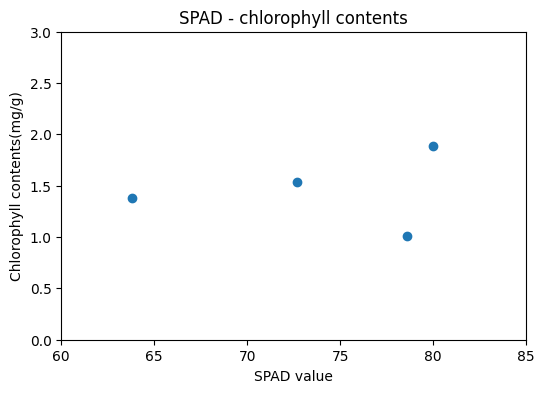

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.title("SPAD - chlorophyll contents")
plt.xlim(60,85)
plt.ylim(0,3)
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents(mg/g)")
plt.savefig("./figures/fig1")
plt.show()

In [9]:
dataset = pd.DataFrame()
dataset["SPAD"] = X.ravel()
dataset["chlorophyll contents"] = y
dataset.head()

,SPAD,chlorophyll contents
0,78.6,1.0104
1,80.0,1.8830
2,72.7,1.5402
3,63.8,1.3846


In [10]:
from scipy.stats import pearsonr

r0, p0 = pearsonr(dataset['SPAD'], dataset['chlorophyll contents'])
r1, p1 = pearsonr(dataset.drop(index=0)['SPAD'], dataset.drop(index=0)['chlorophyll contents'])

print("before removing outliers")
print("Pearson corr:",r0,"p-value:",p0)

print("after removing outliers")
print("Pearson corr:",r1,"p-value:",p1)

before removing outliers
Pearson corr: 0.14127768942294644 p-value: 0.8587223105770536
after removing outliers
Pearson corr: 0.9636352688958121 p-value: 0.17221074983813436


In [11]:
model_linear = LinearRegression()
model_linear.fit(X,y)

LinearRegression()

In [12]:
X_filtered = np.array([80.0, 72.7 , 63.8]).reshape(3,1)
y_filtered = np.array([1.8830, 1.5402, 1.3846])

In [13]:
model_linear_filtered = LinearRegression()
model_linear_filtered.fit(X_filtered,y_filtered)

LinearRegression()

model: chlorophyll contents = w*SPAD + b 

In [14]:
w0 = model_linear.coef_[0]
b0 = model_linear.intercept_
print("w:",w0,"b:",b0)

w: 0.006944325777948532 b: 0.942232365731847


In [15]:
w1 = model_linear_filtered.coef_[0]
b1 = model_linear_filtered.intercept_
print("w:",w1,"b:",b1)

w: 0.03028652453537246 b: -0.5830775206360459


Result of Linear Regression: before/after removing outlier

In [16]:
X_lim = np.linspace(0,100,1002).reshape(-1,1)
y_pred_linear = model_linear.predict(X_lim)
y_pred_linear_filtered = model_linear_filtered.predict(X_lim)

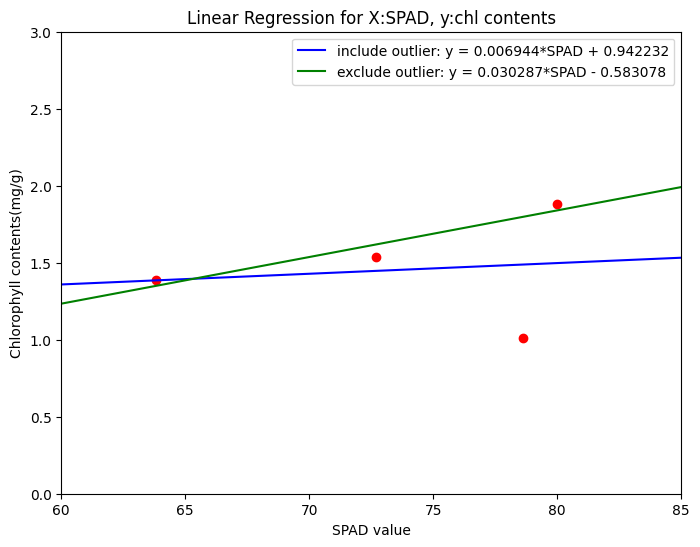

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='red')
plt.plot(X_lim,y_pred_linear,color='blue',label=f"include outlier: y = {w0:.6f}*SPAD + {b0:.6f}")
plt.plot(X_lim,y_pred_linear_filtered, color='green',
         label=f"exclude outlier: y = {w1:.6f}*SPAD - {abs(b1):.6f}")
plt.legend()
plt.xlim(60,85)
plt.ylim(0,3)
plt.title("Linear Regression for X:SPAD, y:chl contents")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents(mg/g)")
plt.savefig("./figures/fig2")

plt.show()

<h1>2. Polinomial regression</h1>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#poli. reg. with degree 2
model_polinomial = make_pipeline(PolynomialFeatures(2,include_bias=False), LinearRegression())
model_polinomial.fit(X,y)

model_polinomial_filtered = make_pipeline(PolynomialFeatures(2,include_bias=False), LinearRegression())
model_polinomial_filtered.fit(X_filtered,y_filtered)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

model: chl. content = p*SPAD**2 + q*SPAD + r

In [19]:
polreg = model_polinomial.named_steps['linearregression']
q0,p0 = polreg.coef_
r0 = polreg.intercept_
print("p0:",p0,"q0:",q0,"r0:",r0)

p0: 0.0013695801204415894 q0: -0.18974763646507697 r0: 7.943195432228935


In [20]:
polreg_filtered = model_polinomial_filtered.named_steps['linearregression']
q1,p1 = polreg_filtered.coef_
r1 = polreg_filtered.intercept_
print("p1:",p1,"q1:",q1,"r1:",r1)

p1: 0.0018194912371711758 q1: -0.23087740780644975 r1: 8.708448706620457


In [21]:
y_pred_poly = model_polinomial.predict(X_lim)
y_pred_poly_filtered= model_polinomial_filtered.predict(X_lim)

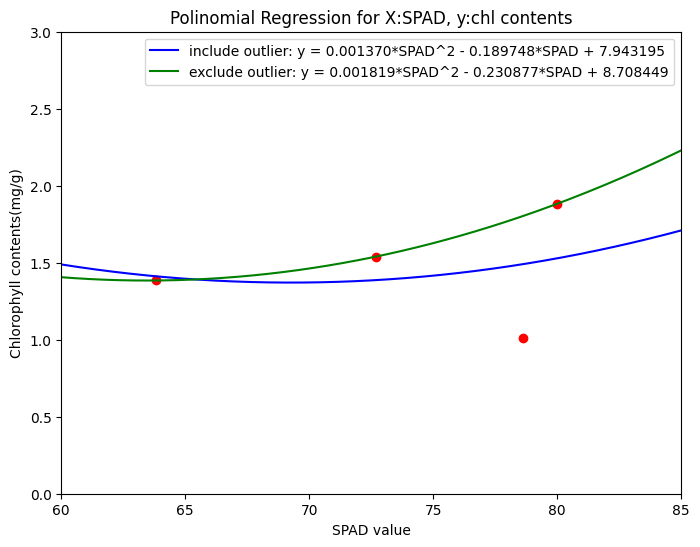

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='red')
plt.plot(X_lim,y_pred_poly,color='blue',label=f"include outlier: y = {p0:.6f}*SPAD^2 - {abs(q0):.6f}*SPAD + {r0:.6f}")
plt.plot(X_lim,y_pred_poly_filtered, color='green',
         label=f"exclude outlier: y = {p1:.6f}*SPAD^2 - {abs(q1):.6f}*SPAD + {r1:.6f}")
plt.legend()
plt.xlim(60,85)
plt.ylim(0,3)
plt.title("Polinomial Regression for X:SPAD, y:chl contents")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents(mg/g)")
plt.savefig("./figures/fig3")

plt.show()

<h1> 3.Exponential model

model: y = n * exp( m * SPAD)

In [23]:
from scipy.optimize import curve_fit

def exp_model(x, n, m):
    return n * np.exp(m * x)

param_exp0, _ = curve_fit(exp_model, X.ravel(), y)
n0,m0 = param_exp0

param_exp1, _ = curve_fit(exp_model,X_filtered.ravel(),y_filtered)
n1,m1 = param_exp1

In [24]:
print("n0:",n0,"m0:",m0)
print("n1:",n1,"m1:",m1)

n0: 3.178448793512311e-14 m0: 0.9999999928257252
n1: -1.116055534681272e-15 m1: 0.9999999991239996


In [25]:
y_pred_exp = exp_model(X_lim,*param_exp0)
y_pred_exp_filtered= exp_model(X_lim,*param_exp1)

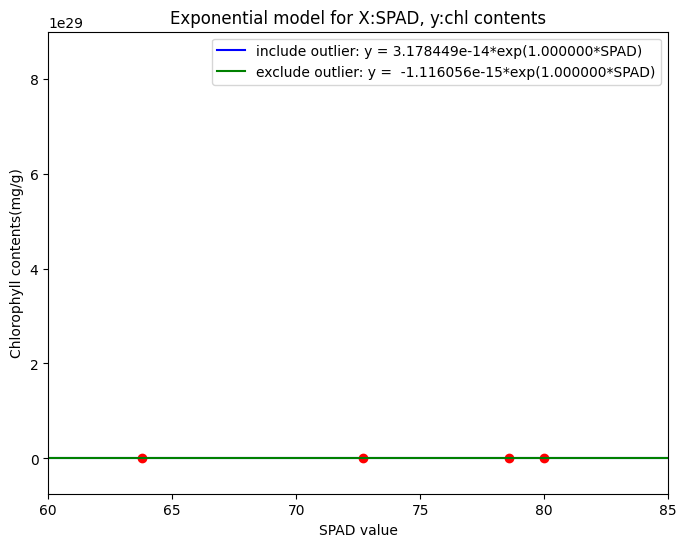

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='red')
plt.plot(X_lim,y_pred_exp,color='blue',label=f"include outlier: y = {n0:2e}*exp({(m0):.6f}*SPAD)")
plt.plot(X_lim,y_pred_exp_filtered, color='green',
         label=f"exclude outlier: y =  {n1:2e}*exp({(m1):.6f}*SPAD)")
plt.legend()
plt.xlim(60,85)
plt.title("Exponential model for X:SPAD, y:chl contents")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents(mg/g)")
plt.savefig("./figures/fig4")

plt.show()

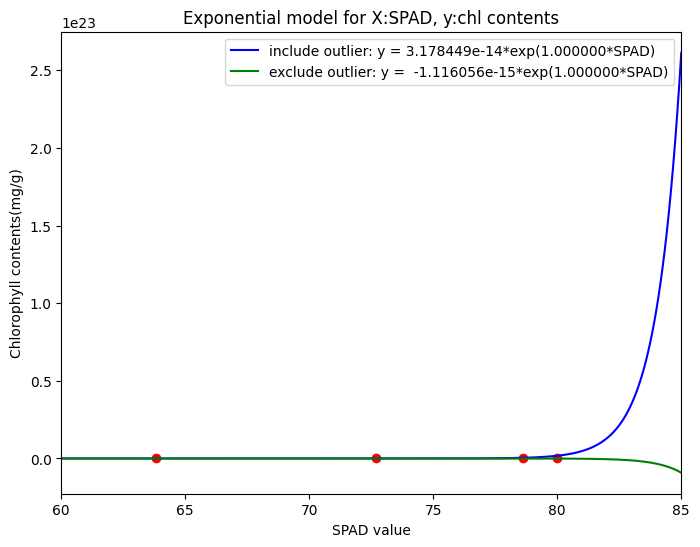

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='red')

X_lim_exp = np.linspace(60,85,302)

plt.plot(X_lim_exp,exp_model(X_lim_exp,*param_exp0),color='blue',label=f"include outlier: y = {n0:2e}*exp({(m0):.6f}*SPAD)")
plt.plot(X_lim_exp,exp_model(X_lim_exp,*param_exp1), color='green',
         label=f"exclude outlier: y =  {n1:2e}*exp({(m1):.6f}*SPAD)")
plt.legend()
plt.xlim(60,85)
plt.title("Exponential model for X:SPAD, y:chl contents")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents(mg/g)")
plt.savefig("./figures/fig4-(2)")

plt.show()

<h1>4. Homogrpahic model

modle: y = (u * SPAD)/(v - SPAD)

In [27]:
from scipy.optimize import curve_fit

def homographic_model(x, u, v):
    return u*x/(v - x)

param_homo0, _ = curve_fit(homographic_model, X.ravel(), y)
u0,v0 = param_homo0

param_homo1, _ = curve_fit(homographic_model, X_filtered.ravel(),y_filtered)
u1,v1 = param_homo1

In [28]:
print("u0:",u0,"v0:",v0)
print("u1:",u1,"v1:",v1)

u0: -2.1814335955183797 v0: -36.677814745895304
u1: -41142777.570233494 v1: -1847084848.506515


In [29]:
y_pred_homo = homographic_model(X_lim,*param_homo0)
y_pred_homo_filtered= homographic_model(X_lim,*param_homo1)

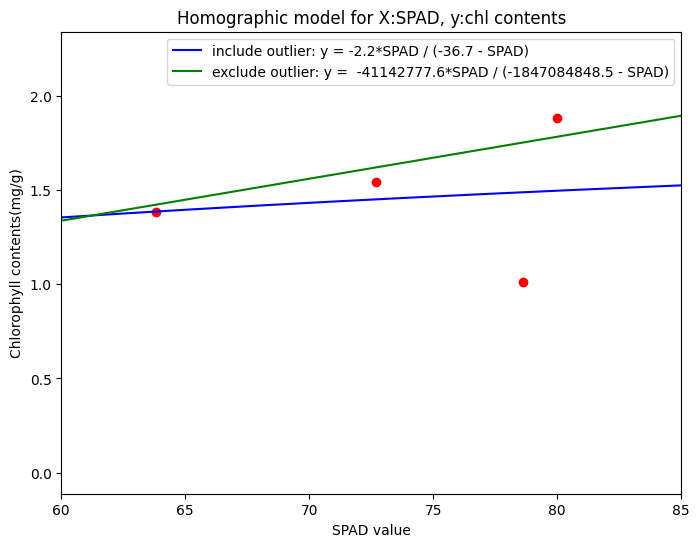

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='red')
plt.plot(X_lim,y_pred_homo,color='blue',label=f"include outlier: y = {u0:.1f}*SPAD / ({(v0):.1f} - SPAD)")
plt.plot(X_lim,y_pred_homo_filtered, color='green',
         label=f"exclude outlier: y =  {u1:.1f}*SPAD / ({v1:.1f} - SPAD)")
plt.legend()
plt.xlim(60,85)
plt.title("Homographic model for X:SPAD, y:chl contents")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents(mg/g)")
plt.savefig("./figures/fig5")

plt.show()

<h1> 5. 종합

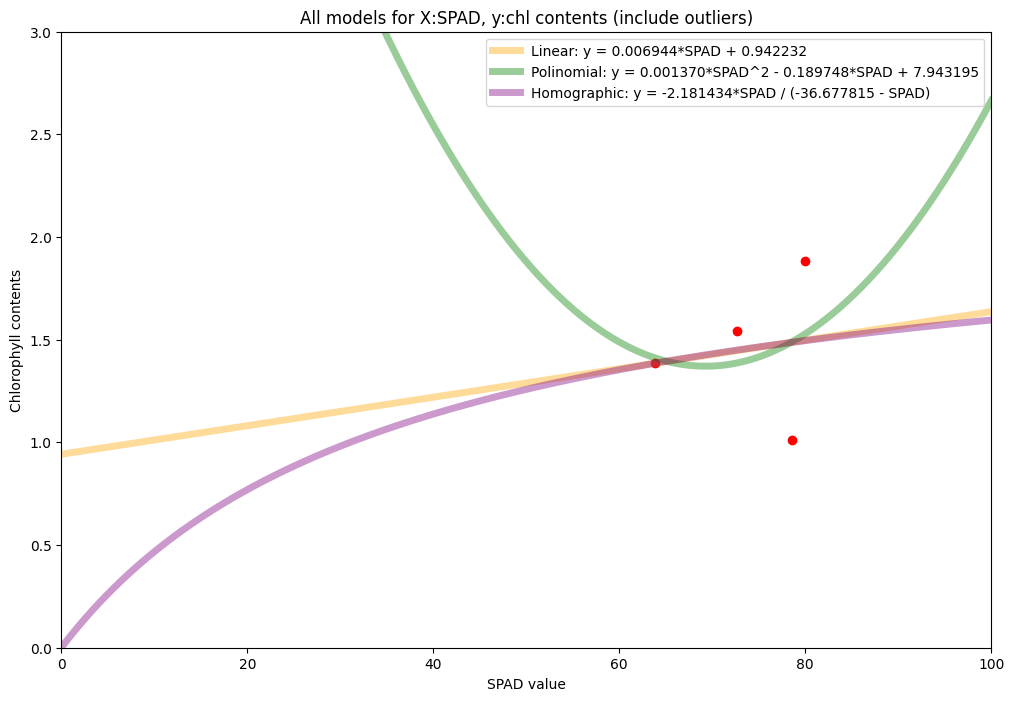

In [31]:
plt.figure(figsize=(12,8))

plt.title("All models including outliers")

plt.scatter(X,y,color='red')

plt.plot(X_lim,y_pred_linear,color='orange',label=f"Linear: y = {w0:.6f}*SPAD + {b0:.6f}",alpha=0.4,linewidth = 5.0)
plt.plot(X_lim,y_pred_poly, color='green',
         label=f"Polinomial: y = {p0:.6f}*SPAD^2 - {abs(q0):.6f}*SPAD + {r0:.6f}",alpha=0.4,
         linewidth = 5.0)
#plt.plot(X_lim,y_pred_exp,color='blue',label=f"Exponential: y = {n0:2e}*exp({(m0):.6f}*SPAD)",
         #alpha=0.4,linewidth = 5.0,linestyle="dashdot")
plt.plot(X_lim,y_pred_homo,color='purple',label=f"Homographic: y = {u0:.6f}*SPAD / ({(v0):.6f} - SPAD)",alpha=0.4,
         linewidth = 5.0)

plt.legend()
plt.xlim(0,100)
plt.ylim(0,3)
plt.title("All models for X:SPAD, y:chl contents (include outliers)")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents")
plt.savefig("./figures/fig6")

plt.show()

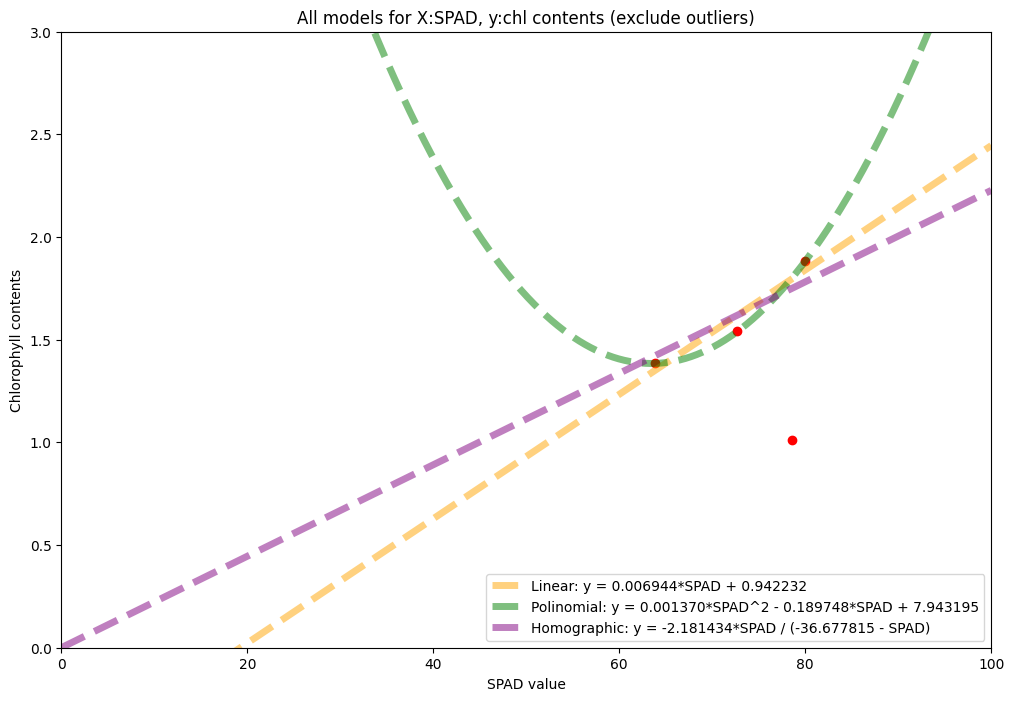

In [32]:
plt.figure(figsize=(12,8))

plt.scatter(X,y,color='red')

plt.plot(X_lim,y_pred_linear_filtered,color='orange',
         label=f"Linear: y = {w0:.6f}*SPAD + {b0:.6f}",alpha=0.5,linewidth = 5.0,
         linestyle="dashed")
plt.plot(X_lim,y_pred_poly_filtered, color='green',
         label=f"Polinomial: y = {p0:.6f}*SPAD^2 - {abs(q0):.6f}*SPAD + {r0:.6f}",alpha=0.5,
         linewidth = 5.0,linestyle="dashed")
#plt.plot(X_lim,y_pred_exp_filtered,color='blue',label=f"Exponential: y = {n0:.6f}*exp({(m0):.6f}*SPAD)",alpha=0.5)
plt.plot(X_lim,y_pred_homo_filtered,color='purple',
         label=f"Homographic: y = {u0:.6f}*SPAD / ({(v0):.6f} - SPAD)",alpha=0.5,
         linewidth = 5.0,linestyle="dashed")

plt.legend()
plt.xlim(0,100)
plt.ylim(0,3)
plt.title("All models for X:SPAD, y:chl contents (exclude outliers)")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents")
plt.savefig("./figures/fig7")

plt.show()

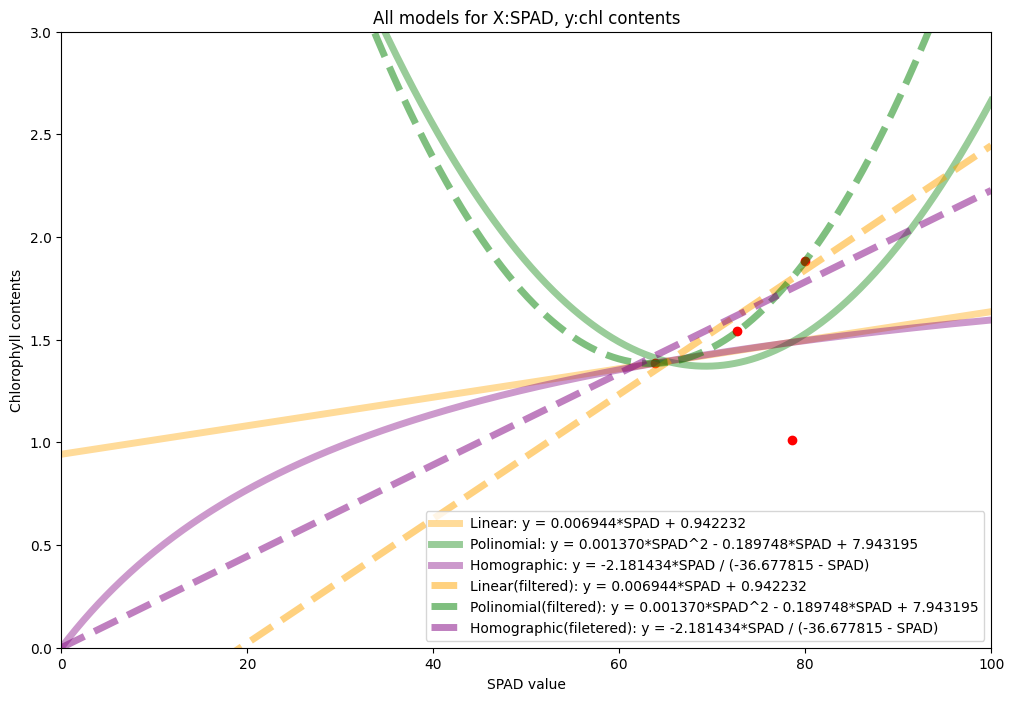

In [33]:
plt.figure(figsize=(12,8))

plt.title("All models including outliers")

plt.scatter(X,y,color='red')

plt.plot(X_lim,y_pred_linear,color='orange',label=f"Linear: y = {w0:.6f}*SPAD + {b0:.6f}",alpha=0.4,linewidth = 5.0)
plt.plot(X_lim,y_pred_poly, color='green',
         label=f"Polinomial: y = {p0:.6f}*SPAD^2 - {abs(q0):.6f}*SPAD + {r0:.6f}",alpha=0.4,
         linewidth = 5.0)
#plt.plot(X_lim,y_pred_exp,color='blue',label=f"Exponential: y = {n0:2e}*exp({(m0):.6f}*SPAD)",
         #alpha=0.4,linewidth = 5.0,linestyle="dashdot")
plt.plot(X_lim,y_pred_homo,color='purple',label=f"Homographic: y = {u0:.6f}*SPAD / ({(v0):.6f} - SPAD)",alpha=0.4,
         linewidth = 5.0)

plt.plot(X_lim,y_pred_linear_filtered,color='orange',label=f"Linear(filtered): y = {w0:.6f}*SPAD + {b0:.6f}",
         alpha=0.5,linewidth = 5.0,linestyle="dashed")
plt.plot(X_lim,y_pred_poly_filtered, color='green',
         label=f"Polinomial(filtered): y = {p0:.6f}*SPAD^2 - {abs(q0):.6f}*SPAD + {r0:.6f}",alpha=0.5,
         linewidth = 5.0,linestyle="dashed")
#plt.plot(X_lim,y_pred_exp_filtered,color='blue',label=f"Exponential: y = {n0:.6f}*exp({(m0):.6f}*SPAD)",alpha=0.5)
plt.plot(X_lim,y_pred_homo_filtered,color='purple',
         label=f"Homographic(filetered): y = {u0:.6f}*SPAD / ({(v0):.6f} - SPAD)",alpha=0.5,
         linewidth = 5.0,linestyle="dashed")

plt.legend()
plt.xlim(0,100)
plt.ylim(0,3)
plt.title("All models for X:SPAD, y:chl contents")
plt.xlabel("SPAD value")
plt.ylabel("Chlorophyll contents")

plt.savefig("./figures/fig8")

plt.show()

<h1> 6. R2 score 및 RMSE

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

<h3>R2_score 계산

In [35]:
MODELS = [model_linear,model_linear_filtered,model_polinomial,model_polinomial_filtered]

In [36]:
def get_metrics(X,y):
    R2_SCORES = []
    RMSE = []

    for model in MODELS:
        y_pred = model.predict(X )
        model_r2 = r2_score(y,y_pred)
        modle_rmse = np.sqrt(mean_squared_error(y,y_pred))
        R2_SCORES.append(model_r2)
        RMSE.append(modle_rmse)

    exp_r2 = r2_score(y,exp_model(X,*param_exp0))
    exp_fil_r2 = r2_score(y,exp_model(X,*param_exp1))
    homo_r2 = r2_score(y,homographic_model(X,*param_homo0))
    homo_fil_r2 = r2_score(y,homographic_model(X,*param_homo1))

    exp_rmse = np.sqrt(mean_squared_error(y,exp_model(X,*param_exp0)))
    exp_fil_rmse = np.sqrt(mean_squared_error(y,exp_model(X,*param_exp1)))
    homo_rmse = np.sqrt(mean_squared_error(y,homographic_model(X,*param_homo0)))
    homo_fil_rmse = np.sqrt(mean_squared_error(y,homographic_model(X,*param_homo1)))


    R2_SCORES.extend([exp_r2,exp_fil_r2,homo_r2,homo_fil_r2])
    RMSE.extend([exp_rmse,exp_fil_rmse,homo_rmse,homo_fil_rmse])

    return R2_SCORES,RMSE

In [37]:
import pandas as pd

In [38]:
R2_ori, RMSE_ori = get_metrics(X,y)
R2_filtered, RMSE_filtered = get_metrics(X_filtered,y_filtered)

In [39]:
MODEL_NAMES = ["Linear","Linear filtered","Polinomial","Polinomial filtered", "Exponential",
               "Exponential filtered", "Homographic", "Homographic filtered"]

In [40]:
metrics_df = pd.DataFrame(columns=MODEL_NAMES, index = ['R2',"RMSE","R2(filtered)","RMSE(filtered)"])

In [41]:
metrics_df.loc["R2"] = R2_ori
metrics_df.loc["RMSE"] = RMSE_ori
metrics_df.loc["R2(filtered)"] = R2_filtered
metrics_df.loc["RMSE(filtered)"] = RMSE_filtered

In [42]:
metrics_df.head()

,Linear,Linear filtered,Polinomial,Polinomial filtered,Exponential,Exponential filtered,Homographic,Homographic filtered
R2,0.019959,-0.599529,0.033365,-0.595126,-8369849915422771966820575969854047746260992.0,-10319514854894125219169111124280466210816.0,0.018866,-0.439846
RMSE,0.310331,0.39646,0.308202,0.395914,906906334761608151040.0,31844412465932857344.0,0.310504,0.376151
R2(filtered),-0.207815,0.928593,-0.151199,1.0,-23848653813087423379955993531722035466600448.0,-29403936752639547148406558412877609304064.0,-0.216164,0.86306
RMSE(filtered),0.228813,0.055635,0.223386,0.0,1016747220514061549568.0,35701280980154437632.0,0.229603,0.077045


In [43]:
metrics_df[["Exponential","Exponential filtered"]] = metrics_df[["Exponential","Exponential filtered"]].applymap(lambda x:f"{x:.2e}")

In [44]:
metrics_df.head()

,Linear,Linear filtered,Polinomial,Polinomial filtered,Exponential,Exponential filtered,Homographic,Homographic filtered
R2,0.019959,-0.599529,0.033365,-0.595126,-8.37e+42,-1.03e+40,0.018866,-0.439846
RMSE,0.310331,0.39646,0.308202,0.395914,9.07e+20,3.18e+19,0.310504,0.376151
R2(filtered),-0.207815,0.928593,-0.151199,1.0,-2.38e+43,-2.94e+40,-0.216164,0.86306
RMSE(filtered),0.228813,0.055635,0.223386,0.0,1.02e+21,3.57e+19,0.229603,0.077045


In [45]:
metrics_df.to_csv("./metrics.csv")